## Seminar 1

## Table data proceedings

In machine learning, as a rule, it all comes down to analyzing tabular data. We can start with a large number of complex tables, images, texts or something else that is not easy, but in the end it all usually comes down to one table, where each object is described by a set of features. Therefore, it is important to be able to work with tables.

And there are also some studies showing that in solving a data mining problem, usually 20% of the time is spent on building models and other interesting work related to what is told in our lectures, and 80% of the time specialists spend on preparing and processing data. ... This includes feature generation, elimination of outliers and omissions, etc. And this, too, is essentially table manipulation.

Conclusion: it is important to be able to work with tabular data. Python has a pandas library for this, which we will be studying today.


Most often, the library name is abbreviated to "pd" during import: 

In [3]:
import pandas as pd

### Distribution of students by electives 

Train wisely on real, complex data. What could be more complex than student-generated data?

Today we will work with the questionnaires of the 2017 and 2018 PMI students of recruitment about which elective courses they want to take. The data was anonymized: the full name was hashed with salt, random noise was added to the ratings.

*Question: how can we deanonymize data after the manipulations that we have done? How would you suggest anonymization? * 

We have 2 tables (for 3rd and 4th courses):

    - 'Timestamp': time of receipt of responses
    - 'ID': student ID (can be repeated if the student has filled out the questionnaire more than once)
    - 'Rating': A student's credit-rating amount (roughly speaking, the sum of the student's grades in all his disciplines with weights - the longer the discipline went, the more weight; details are here: https://www.hse.ru/studyspravka/rate/ )
    - 'Group (in 182 format)': Group number
    - 'MI?': 1 if the student is assigned to the MI specialization, or NaN otherwise (the feature is important, since MI students take two elective courses in the fall, and students of other specializations only one)
    - 'Autumn elective course, priority 1'
    - 'Autumn elective course, priority 2'
    - 'Autumn elective course, priority 3'
    - 'Spring elective course, priority 1'
    - 'Spring elective course, priority 2'
    - 'Spring elective course, priority 3'
    - 'Are you filling out the questionnaire for the first time?': "Yes" or "No"
   
Additional columns for the 4th course:
    
    - 'Group (in 173 format)': Group number
    - 'blended-course': Selection of blended-course (number of places is unlimited) 

Let's load the data (note that we can easily read the xlsx files): 

In [ ]:
!wget  -O 'data_3_course.xlsx' -q 'https://www.dropbox.com/s/ysxs5srafoyxknb/_data_3_course.xlsx?dl=1'
!wget  -O 'data_4_course.xlsx' -q 'https://www.dropbox.com/s/hfg2mzmvcivtxqk/_data_4_course.xlsx?dl=1'

In [5]:
data3 = pd.read_excel('data_3_course.xlsx')
data4 = pd.read_excel('data_4_course.xlsx')

In [6]:
data3

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,"704,0",181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,"646,0",181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,"517,0",185,NaN,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Yes
219,2020-05-20 11:57:07.326,e6f5eb76b34e7ab7bac753e6cb0a2279,"634,0",184,NaN,Теория баз данных,Безопасность компьютерных систем,Моделирование временных рядов,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,Yes
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,"584,0",188,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Yes
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,No


Let's see the size of the table: 

In [7]:
data3.shape

(223, 12)

To begin with, we will work with one table for the 3rd course. Now the data is stored in the variable ```data3```, which is of type [DataFrame] (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html): 

In [8]:
type(data3)

pandas.core.frame.DataFrame

DataFrame can also be created manually: 

In [9]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 
                   'BBB' : [10,20,30,40], 
                   'CCC' : [100,50,'E',-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,E
3,7,40,-50


The DataFrame can be partially rendered in a jupyter notebook using the ```head``` (first lines) and ```sample``` (random lines) methods: 

In [10]:
data3.head(2)

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,"704,0",181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,"646,0",181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No


In [11]:
data3.sample(3)

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
11,2020-05-15 14:52:24.210,3de75278c0cdb78bbe54267f65c67d25,"565,0",187,NaN,Язык SQL,Теория баз данных,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Системы баз данных,Анализ данных в бизнесе,Yes
197,2020-05-18 23:43:04.866,4ab8340cfb08da86c14a2cc3c3fad908,"683,0",182,NaN,Statistical Learning Theory,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Промышленное программирование на языке Java,Анализ данных в бизнесе,Yes
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,"718,0",181,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Yes


In [12]:
data3.tail(2)

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,No
222,2020-05-19 04:24:29.000,9d19b0d5f4fc8d7edc2258406f872c4e,"694,0",188,NaN,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,NaN


You can dig a little into the internals of Jupyter to display several tables at once: 

In [13]:
from IPython.display import display
display(data3.sample(3)), display(data3.sample(3))

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
198,2020-05-18 23:43:49.020,2b844a1be49f4ed2d578fb50b752883b,"696,0",184,NaN,Безопасность компьютерных систем,Матричные вычисления,Высокопроизводительные вычисления,Дополнительные главы прикладной статистики,Дискретная оптимизация,Промышленное программирование на языке Java,Yes
189,2020-05-18 23:30:27.005,7bf79897c5645954846e2e03ec803887,"686,0",186,NaN,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Yes
125,2020-05-18 20:57:09.583,42df9e301b39e4295fe849aa2abdfc7c,"627,0",181,NaN,Высокопроизводительные вычисления,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Численные методы,No


,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
207,2020-05-19 00:00:51.191,840e108d7366fbf4f985f267c74ad523,"677,0",188,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,No
182,2020-05-18 23:09:34.102,5a66e3b77559d14dd20fc4df99671688,"620,0",183,NaN,Язык SQL,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Yes
89,2020-05-18 18:01:52.604,fd784637a19d65bbe5b07d6efac5a05d,"624,0",182,NaN,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Машинное обучение 2,Дискретная оптимизация,Компьютерные сети,Yes


(None, None)

In [15]:
print(data3.sample(1))
print(data3.sample(2))

                  Timestamp                                ID Rating  \
206 2020-05-18 23:59:29.314  f7f123322f77fd451a30ed4979c323fc  595,0   

     Group (in 182 format)  MI? Autumn elective course, priority 1  \
206                    185  NaN                           Язык SQL   

    Autumn elective course, priority 2 Autumn elective course, priority 3  \
206   Безопасность компьютерных систем                  Теория баз данных   

              Spring elective course, priority 1  \
206  Промышленное программирование на языке Java   

    Spring elective course, priority 2 Spring elective course, priority 3  \
206                  Компьютерные сети                 Системы баз данных   

    Are you filling out the questionnaire for the first time?  
206                                                 No         
                  Timestamp                                ID Rating  \
196 2020-05-18 23:40:41.196  47e2d8bbb630bc2d9b3fbf98fe77cffb  631,0   
23  2020-05-15 22:30:31.902

If you really want to display all the rows of the table, then you can do this: 

In [ ]:
# pd.options.display.max_rows = 999
# data3

In [16]:
pd.options.display.max_rows = 20

A DataFrame is essentially a two-dimensional table with a bunch of useful methods. Let's take a look at some of them.

```columns``` - returns the column names

```dtypes``` - column types 


In [17]:
data3.columns

Index(['Timestamp', 'ID', 'Rating', 'Group (in 182 format)', 'MI?',
       'Autumn elective course, priority 1',
       'Autumn elective course, priority 2',
       'Autumn elective course, priority 3',
       'Spring elective course, priority 1',
       'Spring elective course, priority 2',
       'Spring elective course, priority 3',
       'Are you filling out the questionnaire for the first time?'],
      dtype='object')

In [18]:
data3.dtypes

Timestamp                                                    datetime64[ns]
ID                                                                   object
Rating                                                               object
Group (in 182 format)                                                 int64
MI?                                                                 float64
Autumn elective course, priority 1                                   object
Autumn elective course, priority 2                                   object
Autumn elective course, priority 3                                   object
Spring elective course, priority 1                                   object
Spring elective course, priority 2                                   object
Spring elective course, priority 3                                   object
Are you filling out the questionnaire for the first time?            object
dtype: object

There are several ways in a DataFrame to refer to rows, columns and individual table elements: square brackets and the ```loc```, ```iloc``` methods.

As usual, the best source of knowledge on this is [documentation] (https://pandas.pydata.org/docs/user_guide/indexing.html).
Below is a summary. 

You can pass the index value (the number in the index column) of the row to the ```loc``` method to get this row: 

In [19]:
data3.loc[2]

Timestamp                                                          2020-05-15 03:12:41.480000
ID                                                           30f3653fc176d54e89ac3179c455c6dd
Rating                                                                                  624,0
Group (in 182 format)                                                                     185
MI?                                                                                       NaN
Autumn elective course, priority 1                           Безопасность компьютерных систем
Autumn elective course, priority 2                                       Матричные вычисления
Autumn elective course, priority 3                              Моделирование временных рядов
Spring elective course, priority 1                                     Дискретная оптимизация
Spring elective course, priority 2                                        Машинное обучение 2
Spring elective course, priority 3                          

We got a separate line as an object of the [Series] class (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html): 

In [20]:
type(data3.loc[2])

pandas.core.series.Series

And using slices, you can select a part of the table: 

In [21]:
data3.loc[2:4]

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes


The ```loc``` is sliced by index and includes the last element.

The ```iloc``` method works in a similar way, but it does not index the elements by index, but in order in the table (which may differ from index). For example: 

In [22]:
subset = data3.sample(5)
subset

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
19,2020-05-15 21:34:32.550,86d929f6fd741e56e93cee5900298849,"760,0",181,NaN,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Yes
207,2020-05-19 00:00:51.191,840e108d7366fbf4f985f267c74ad523,"677,0",188,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,No
145,2020-05-18 21:38:00.271,b3e75ee2a708cef65cc2f80da894dd50,"560,0",187,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Численные методы,Yes
126,2020-05-18 21:02:28.759,5c49473012411a1eee72f8ea63767adf,"572,0",183,NaN,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,No
122,2020-05-18 20:48:02.936,59347ad5e9d8099a9a8fa58b841bdf05,"708,0",184,1.0,Моделирование временных рядов,Теория баз данных,Принятие решений в условиях риска и неопределё...,Анализ данных в бизнесе,Численные методы,Системы баз данных,Yes


In [26]:
subset.iloc[2]

Timestamp                                                                     2020-05-18 21:38:00.271000
ID                                                                      b3e75ee2a708cef65cc2f80da894dd50
Rating                                                                                             560,0
Group (in 182 format)                                                                                187
MI?                                                                                                  NaN
Autumn elective course, priority 1                                      Безопасность компьютерных систем
Autumn elective course, priority 2                                         Моделирование временных рядов
Autumn elective course, priority 3                                                              Язык SQL
Spring elective course, priority 1                                               Анализ данных в бизнесе
Spring elective course, priority 2                     

In [25]:
subset.loc[19:145]

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
19,2020-05-15 21:34:32.550,86d929f6fd741e56e93cee5900298849,"760,0",181,NaN,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Yes
207,2020-05-19 00:00:51.191,840e108d7366fbf4f985f267c74ad523,"677,0",188,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,No
145,2020-05-18 21:38:00.271,b3e75ee2a708cef65cc2f80da894dd50,"560,0",187,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Численные методы,Yes


If we just call ```loc```[2], then we get an error: 


In [ ]:
# subset.loc[2]

Using ```iloc```, you can also make slices, but they do not include the last element in them (as in ordinary slices in Python, **unlike loc**): 

In [27]:
data3.iloc[2:4]

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes


Slices can be taken not only by rows, but also by columns. Note the differences in column indexing in  ```loc``` and ```iloc```:

In [28]:
data3.iloc[2:4,2:6]

,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1"
2,"624,0",185,NaN,Безопасность компьютерных систем
3,"579,0",182,NaN,Statistical Learning Theory


In [29]:
data3.loc[2:4, 'Rating':'Autumn elective course, priority 1']

,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1"
2,"624,0",185,NaN,Безопасность компьютерных систем
3,"579,0",182,NaN,Statistical Learning Theory
4,"632,0",183,NaN,Высокопроизводительные вычисления


In [31]:
data3.loc[2:4, data3.columns[2]:data3.columns[6]]

,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2"
2,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления
3,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления
4,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем


You can refer to one or more columns through square brackets: 

In [32]:
data3['Rating'].head(3)

0    704,0
1    646,0
2    624,0
Name: Rating, dtype: object

In [33]:
data3[['Rating', 'Autumn elective course, priority 1']].head(3)

,Rating,"Autumn elective course, priority 1"
0,"704,0",Язык SQL
1,"646,0",Высокопроизводительные вычисления
2,"624,0",Безопасность компьютерных систем


There are more interesting ways to index. For example, let's select students from group 182: 

In [34]:
data3[data3['Group (in 182 format)'] == 182].sample(3)

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
48,2020-05-17 16:15:12.312,e5fb2c5a9d8a09915b15d14bf6cf3174,"753,0",182,NaN,Безопасность компьютерных систем,Матричные вычисления,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Численные методы,Yes
68,2020-05-18 12:55:36.645,d61cc836b6aa3cdc4a40e2e8ada0b937,"671,0",182,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,No
75,2020-05-18 16:45:06.205,081eba3952cfc116e0e9b941d6a974a2,"692,0",182,NaN,Безопасность компьютерных систем,Матричные вычисления,Теория баз данных,Промышленное программирование на языке Java,Дискретная оптимизация,Системы баз данных,No


Mathematical operations can be performed with DataFrames and Series of the same structure: 

In [35]:
strange_feature = data3['Rating'] ** 2 + data3['Group (in 182 format)']
strange_feature.head()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

Видимо, 'Рейтинг' представлен в виде строки. Исправим это:

In [36]:
data3['Rating'].apply(lambda x: float(str(x).replace(',', '.')))

strange_feature = data3['Rating'] ** 2 + data3['Group (in 182 format)']
strange_feature.head()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

We get the same error, because the ```apply``` method does not modify the table, but simply returns a new column. They usually get around it like this: 

In [38]:
data3['Rating'] = data3['Rating'].apply(lambda x: float(str(x).replace(',', '.')))

strange_feature = data3['Rating'] ** 2 + data3['Group (in 182 format)']
strange_feature.head()

0    495797.0
1    417497.0
2    389561.0
3    335423.0
4    399607.0
dtype: float64

In the future, we will need to work with students' percentiles. To make a column like this, pandas already has a suitable method: 

In [39]:
data3['percentile'] = data3['Rating'].rank() / data3.shape[0]

# добавим также наш странный признак
data3['new'] = strange_feature

If desired, you can remove any feature using the  ```drop``` method :

In [41]:
data3 = data3.drop(columns=['new'])
data3.head()

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?,percentile
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.820628
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No,0.495516
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes,0.320628
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.123318
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes,0.401345


### Exploratory analysis

Now let's examine our data. Your homework assignment will be to assign students to courses, taking into account their preferences, ratings and restrictions. Let's start preparing for this. 

First, let's take another look at the data types and think about whether we need to change them: 

In [42]:
data3.dtypes

Timestamp                                                    datetime64[ns]
ID                                                                   object
Rating                                                              float64
Group (in 182 format)                                                 int64
MI?                                                                 float64
Autumn elective course, priority 1                                   object
Autumn elective course, priority 2                                   object
Autumn elective course, priority 3                                   object
Spring elective course, priority 1                                   object
Spring elective course, priority 2                                   object
Spring elective course, priority 3                                   object
Are you filling out the questionnaire for the first time?            object
percentile                                                          float64
dtype: objec

It seems to be not ...

And what about the table for the 4th year? For some courses, students of the 3rd and 4th years of study are selected together, so it is necessary to collect the data in one table. * Can this be done without preparation? * 

In [43]:
data3.head()

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?,percentile
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.820628
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No,0.495516
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes,0.320628
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.123318
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes,0.401345


In [44]:
data4.head()

,Timestamp,ID,Rating,Group (in 173 format),blended-course,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?
0,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,"995,0",172,DevOps,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Yes
1,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,"1105,0",176,DevOps,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Yes
2,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,"1083,0",172,DevOps,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Yes
3,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,"1169,0",171,DevOps,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Yes
4,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,"1077,0",176,DevOps,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Yes


The ratings seem to have different distributions. Let's check it out: 

In [45]:
data3['Rating'].describe()

count    223.000000
mean     648.816143
std       58.255552
min      495.000000
25%      609.000000
50%      647.000000
75%      691.000000
max      784.000000
Name: Rating, dtype: float64

In [46]:
data4['Rating'].describe()

count        138
unique       117
top       1085,0
freq           3
Name: Rating, dtype: object

Yes, the rating for the 4th year must also be converted to a numeric type. 

In [47]:
data4['Rating'] = data4['Rating'].apply(lambda x: float(str(x).replace(',', '.')))
data4['Rating'].describe()

count     138.000000
mean     1155.188406
std        91.659203
min       963.000000
25%      1086.500000
50%      1155.500000
75%      1217.500000
max      1456.000000
Name: Rating, dtype: float64

It can be seen that the quantiles are indeed different - therefore, the ratings themselves should not be used after joining tables, you only need to work with percentiles. Let's calculate them and combine the tables using the  ```concat``` method:

In [48]:
data4['percentile'] = data4['Rating'].rank() / data4.shape[0]


data = pd.concat([data3, data4])
data.head()

,Timestamp,ID,Rating,Group (in 182 format),MI?,"Autumn elective course, priority 1","Autumn elective course, priority 2","Autumn elective course, priority 3","Spring elective course, priority 1","Spring elective course, priority 2","Spring elective course, priority 3",Are you filling out the questionnaire for the first time?,percentile,Group (in 173 format),blended-course
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.820628,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No,0.495516,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes,0.320628,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.123318,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes,0.401345,NaN,NaN


In [49]:
data.shape

(361, 15)

In [50]:
data.columns

Index(['Timestamp', 'ID', 'Rating', 'Group (in 182 format)', 'MI?',
       'Autumn elective course, priority 1',
       'Autumn elective course, priority 2',
       'Autumn elective course, priority 3',
       'Spring elective course, priority 1',
       'Spring elective course, priority 2',
       'Spring elective course, priority 3',
       'Are you filling out the questionnaire for the first time?',
       'percentile', 'Group (in 173 format)', 'blended-course'],
      dtype='object')

Now, for convenience, let's rename the columns (note the  ```inplace=True```):

In [51]:
data.rename(columns={'Timestamp':'timestamp',
                     'ID':'id',
                     'Rating':'rating',
                     'MI?':'is_mi',
                     'Group (in 182 format)':'18_group',
                     'Group (in 173 format)':'17_group',
                     'Autumn elective course, priority 1':'fall_1',
                     'Autumn elective course, priority 2':'fall_2',
                     'Autumn elective course, priority 3':'fall_3',
                     'Spring elective course, priority 1':'spring_1',
                     'Spring elective course, priority 2':'spring_2',
                     'Spring elective course, priority 3':'spring_3',
                     'Are you filling out the questionnaire for the first time?':'is_first_time',
                     'blended-course':'blended'},
           inplace=True)

In [53]:
subset.columns = ['1','2']

ValueError: Length mismatch: Expected axis has 12 elements, new values have 2 elements

Since (almost all) columns now have valid variable names in Python, we can use another way to refer to table columns as class fields: 

In [54]:
data.fall_1

0                                             Язык SQL
1                    Высокопроизводительные вычисления
2                     Безопасность компьютерных систем
3                          Statistical Learning Theory
4                    Высокопроизводительные вычисления
                            ...                       
133                        Statistical Learning Theory
134                  Анализ неструктурированных данных
135    Сбор и обработка данных с помощью краудсорсинга
136                   Безопасность компьютерных систем
137                  Анализ неструктурированных данных
Name: fall_1, Length: 361, dtype: object

Often, work with data begins with finding missing values (NaN, etc.) and filling them in. First, let's look at their availability: 

In [55]:
data.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
dtype: int64

It can be seen that there are no meaningful gaps here - there are only problems with columns specific to one of the courses.

It is necessary to fill in the blanks in accordance with the meaning of the column. Can be filled using mean, median, constant, or other values. This is usually done using the ```fillna()``` method. 


Also for exploratory analysis, the ```groupby(column)```  method can help.

It groups objects by the specified column (s). It is also necessary to specify what statistics for the grouping to display. It can be count, mean, or others. From the huge functionality of this method, we will analyze only a few basic tricks: 


In [56]:
data.groupby('fall_1').count()[['id', 'is_mi']]

,id,is_mi
fall_1,,
Statistical Learning Theory,26,1
Анализ неструктурированных данных,32,0
Байесовские методы машинного обучения,17,0
Безопасность компьютерных систем,110,4
Высокопроизводительные вычисления,42,0
Глубинное обучение в обработке звука,12,0
Матричные вычисления,14,1
Моделирование временных рядов,24,7
Принятие решений в условиях риска и неопределённости,5,0


*What conclusions can you draw from this? * 

Let's do ```groupby``` with averaging: 

In [57]:
data.groupby(by='fall_1').mean()

C:\Users\Sviatlana_Staleuskay\AppData\Local\Temp\ipykernel_27356\3484208337.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='fall_1').mean()


,rating,18_group,is_mi,percentile,17_group
fall_1,,,,,
Statistical Learning Theory,886.769231,183.428571,1.0,0.490706,173.000000
Анализ неструктурированных данных,1124.000000,NaN,NaN,0.412477,172.593750
Байесовские методы машинного обучения,1190.647059,NaN,NaN,0.613598,171.411765
Безопасность компьютерных систем,785.872727,184.481481,1.0,0.535848,174.413793
Высокопроизводительные вычисления,968.309524,184.055556,NaN,0.600555,174.958333
Глубинное обучение в обработке звука,1163.250000,NaN,NaN,0.539553,172.916667
Матричные вычисления,671.857143,183.357143,1.0,0.613069,NaN
Моделирование временных рядов,671.125000,184.869565,1.0,0.507908,175.000000
Принятие решений в условиях риска и неопределённости,762.600000,186.333333,NaN,0.188945,175.000000


From here we learn the middle percentile for a particular course of choice.
Please note that the average rating is not very indicative here due to its different distributions for different years of study.

What is displayed on the next line? 

In [ ]:
data.groupby(by='fall_1').count()[['17_group', '18_group']].sum(axis=1)

It can be helpful to look at the basic statistics for each *numeric* attribute (column). The ```describe``` method allows you to quickly do this: 


In [ ]:
data.describe()

*Какие элементы таблицы выше могут быть полезны? Для чего?*

Студентам специализации МОП (машинное обучение и приложения) нельзя выбирать курс "Машинное обучение 2" в качестве весеннего курса по выбору. Давайте проверим, есть ли те, кто попытался:

In [58]:
#!wget  -O 'ml_students_anon.xlsx' -q 'https://www.dropbox.com/s/izc21kik0b8iw10/_ml_students_anon.xlsx?dl=0'

ml_students = pd.read_excel('ml_students_anon.xlsx')

If you are familiar with SQL, then you know that it is very often used the JOIN operation to join several tables by one or another value. Pandas also has this, the function is called ```merge```.

We have two tables: (1) the priorities of the students by electives and (2) the specializations to which the students are assigned. These tables contain different information about students, but in both, a particular student has the same ID. Let's say we now want to join these tables - that is, get a new table in which for each student there is information about the priorities for the electives, and about his specialization. This is exactly what the ```merge``` operation is for.

The idea of joining tables is also reflected in the picture below.

<img src="https://i.imgur.com/WYyBFTE.png" style="width: 400px">

In [59]:
data = data.merge(ml_students, on='id', how='left')

In [60]:
data[(data['is_ml_student'] == True) & 
     (
         (data['spring_1'] == 'Машинное обучение 2')
         |
         (data['spring_2'] == 'Машинное обучение 2')
         |
         (data['spring_3'] == 'Машинное обучение 2')
     )] 

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
20,2020-05-15 21:55:16.699,f0f6f3881894172a0f04e79b554b49e6,676.0,181.0,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Численные методы,Дополнительные главы прикладной статистики,Yes,0.663677,NaN,NaN,True
27,2020-05-16 13:02:24.706,5daee1bd98559bb2c52373e416942225,659.0,182.0,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,No,0.556054,NaN,NaN,True
119,2020-05-18 20:34:07.220,fc2c60b8004aa91bc272df84628621ff,642.0,183.0,NaN,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Машинное обучение 2,Анализ данных в бизнесе,No,0.477578,NaN,NaN,True
137,2020-05-18 21:24:23.667,6ed89e424179b0510e3f7c0cb7369ad6,647.0,187.0,NaN,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Машинное обучение 2,Yes,0.502242,NaN,NaN,True
179,2020-05-18 23:01:03.214,abceddfa2fc4eae8cff4a4e712abb3fb,663.0,183.0,NaN,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Yes,0.585202,NaN,NaN,True


Let's try to understand if there is an obvious relationship between the rating and the group number. First, let's look at the correlations (the corr function calculates the Pearson correlation by default): 

In [61]:
corrmat = data[['rating', '18_group', '17_group']].corr()
corrmat

,rating,18_group,17_group
rating,1.000000,-0.253637,0.013607
18_group,-0.253637,1.000000,NaN
17_group,0.013607,NaN,1.000000


*Interpret the results. Can you trust them, is it wise to look at correlations?* 

There are not so many numerical factors here, but in practice there are dozens or even hundreds of them. In this case, it can be useful to look at this correlation matrix as a heatmap:

In [62]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
corrmat

,rating,18_group,17_group
rating,1.000000,-0.253637,0.013607
18_group,-0.253637,1.000000,NaN
17_group,0.013607,NaN,1.000000


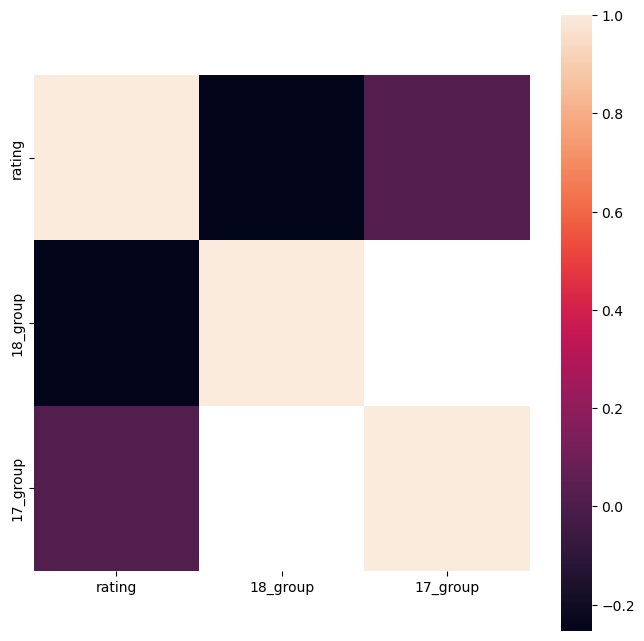

In [63]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, square=True)
plt.show()

Charts should be taken seriously, they should be clear and informative. Let's look at a few examples.

*Comment on what you think is good and bad in these graphs.* 

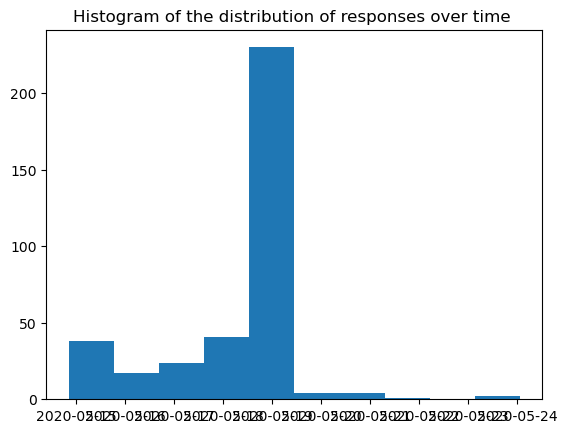

In [65]:
plt.hist(data['timestamp'])
plt.title('Histogram of the distribution of responses over time ')
plt.show()

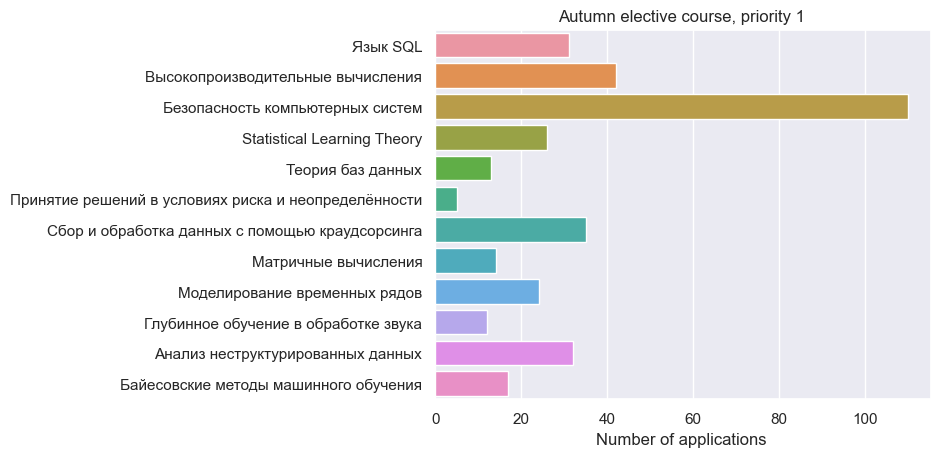

In [66]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='fall_1', data=data)
ax.set_title('Autumn elective course, priority 1 ')
ax.set_ylabel('')

ax.set(xlabel='Number of applications ')


plt.show()

C:\Users\Sviatlana_Staleuskay\AppData\Local\Temp\ipykernel_27356\3378726959.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr_raiting_med = crs3.groupby('18_group').median()['rating']
C:\Users\Sviatlana_Staleuskay\AppData\Local\Temp\ipykernel_27356\3378726959.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr_raiting_sum = crs3.groupby('18_group').sum()['rating']


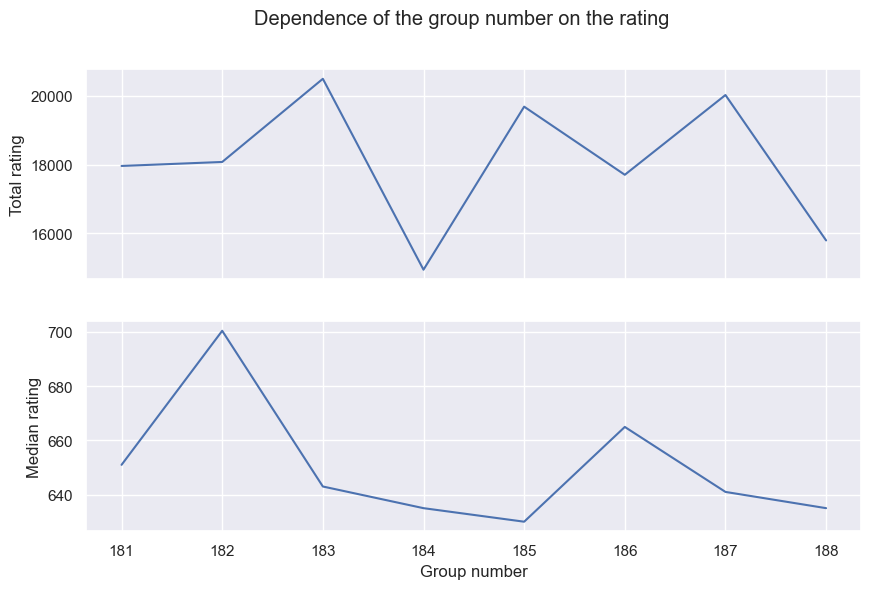

In [67]:
crs3 = data[data['17_group'].isna()]
gr_raiting_med = crs3.groupby('18_group').median()['rating']
gr_raiting_sum = crs3.groupby('18_group').sum()['rating']

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('Dependence of the group number on the rating')
#fig.text('rating')


axs[0].plot(gr_raiting_sum)
axs[0].set_ylabel('Total rating')

axs[1].plot(gr_raiting_med)
axs[1].set_ylabel('Median rating')


plt.xlabel('Group number')

plt.show()

Let's save the resulting table so that you can continue working with it at home: 

In [ ]:
data.to_excel('end_seminar.xlsx', index=False)

In [68]:
data.groupby(by = 'fall_1').mean()

C:\Users\Sviatlana_Staleuskay\AppData\Local\Temp\ipykernel_27356\3812390407.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by = 'fall_1').mean()


,rating,18_group,is_mi,percentile,17_group
fall_1,,,,,
Statistical Learning Theory,886.769231,183.428571,1.0,0.490706,173.000000
Анализ неструктурированных данных,1124.000000,NaN,NaN,0.412477,172.593750
Байесовские методы машинного обучения,1190.647059,NaN,NaN,0.613598,171.411765
Безопасность компьютерных систем,785.872727,184.481481,1.0,0.535848,174.413793
Высокопроизводительные вычисления,968.309524,184.055556,NaN,0.600555,174.958333
Глубинное обучение в обработке звука,1163.250000,NaN,NaN,0.539553,172.916667
Матричные вычисления,671.857143,183.357143,1.0,0.613069,NaN
Моделирование временных рядов,671.125000,184.869565,1.0,0.507908,175.000000
Принятие решений в условиях риска и неопределённости,762.600000,186.333333,NaN,0.188945,175.000000


In [69]:
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.820628,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,No,0.495516,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Yes,0.320628,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Yes,0.123318,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Yes,0.401345,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1028.0,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Yes,0.079710,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1059.0,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Yes,0.159420,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1102.0,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Yes,0.322464,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,965.0,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Yes,0.014493,172.0,DevOps,NaN


In [70]:
from platform import python_version

print(python_version())

3.8.16
